In [1]:
import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt

# find parameters

In [2]:
# prepare reconstructor, load in data
S = reconstruction.Reconstructor_GPU()
S.set_Q(7)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/FIT/DataFiles/HexFZ.dat'         # fundamental zone file
S.expDataInitial = '/home/hedm/work/I9_test_data/Integrated/S18_z1_'      # educed binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([100,100],voxelsize=0.01)                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'SearchBatchSize_13000_100x100_0.01.npy'             # output file name
S.searchBatchSize = 13000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare()                                                         # load data to gpu,

(256, 3)
7
voxelpos shape is (10000, 3)
loading det 0, rotation 0
loading det 0, rotation 1
loading det 0, rotation 2
loading det 0, rotation 3
loading det 0, rotation 4
loading det 0, rotation 5
loading det 0, rotation 6
loading det 0, rotation 7
loading det 0, rotation 8
loading det 0, rotation 9
loading det 0, rotation 10
loading det 0, rotation 11
loading det 0, rotation 12
loading det 0, rotation 13
loading det 0, rotation 14
loading det 0, rotation 15
loading det 0, rotation 16
loading det 0, rotation 17
loading det 0, rotation 18
loading det 0, rotation 19
loading det 0, rotation 20
loading det 0, rotation 21
loading det 0, rotation 22
loading det 0, rotation 23
loading det 0, rotation 24
loading det 0, rotation 25
loading det 0, rotation 26
loading det 0, rotation 27
loading det 0, rotation 28
loading det 0, rotation 29
loading det 0, rotation 30
loading det 0, rotation 31
loading det 0, rotation 32
loading det 0, rotation 33
loading det 0, rotation 34
loading det 0, rotation 3

loading det 1, rotation 123
loading det 1, rotation 124
loading det 1, rotation 125
loading det 1, rotation 126
loading det 1, rotation 127
loading det 1, rotation 128
loading det 1, rotation 129
loading det 1, rotation 130
loading det 1, rotation 131
loading det 1, rotation 132
loading det 1, rotation 133
loading det 1, rotation 134
loading det 1, rotation 135
loading det 1, rotation 136
loading det 1, rotation 137
loading det 1, rotation 138
loading det 1, rotation 139
loading det 1, rotation 140
loading det 1, rotation 141
loading det 1, rotation 142
loading det 1, rotation 143
loading det 1, rotation 144
loading det 1, rotation 145
loading det 1, rotation 146
loading det 1, rotation 147
loading det 1, rotation 148
loading det 1, rotation 149
loading det 1, rotation 150
loading det 1, rotation 151
loading det 1, rotation 152
loading det 1, rotation 153
loading det 1, rotation 154
loading det 1, rotation 155
loading det 1, rotation 156
loading det 1, rotation 157
loading det 1, rotat

In [4]:
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
centerL, centerJ, centerK, centerRot = S.geo_opt_phase_0(rotOptimization=True) 

update K to [[2011.11111111 2011.11111111]], max hitratio is  0.40000000596 ||angle [110.39322536  85.09152142 274.9896724 ]  
update L to [[5.22222222 7.22222222]], max hitratio is  0.40000000596 ||euler angle [201.08100255  39.45258437 157.35975787]  
update J to [[1017.70534974 1017.70534974]], max hitratio is  0.466666668653 ||ngle [247.79374429 119.13784329 321.63369331] 
update K to [[2011.11111111 2010.52685871]], max hitratio is  0.488888889551 ||ngle [343.6164086   87.88827888  22.29761017] 
update L to [[5.22222222 7.22546807]], max hitratio is  0.488888889551 ||uler angle [163.35020335  92.39010429 217.73006352] 
update J to [[1017.70534974 1016.06443574]], max hitratio is  0.478260874748 ||ngle [343.50786458  87.90236954  22.10971974] 
update rot to [[[ 9.00000000e+01  9.00000000e+01  0.00000000e+00]ructed euler angle [343.30074398  87.46431547  22.1507914 ] 
  [ 8.99994770e+01  8.99998305e+01 -3.41932163e-04]]], max hitratio is  0.444444447756 ,shape or rot is (1, 2, 3)||


update K to [[2007.7021878  2006.05206218]], max hitratio is  0.454545468092 ||ngle [ 48.57418663  75.89086084 319.50991212] 
update L to [[5.33352602 7.34646188]], max hitratio is  0.555555582047 ||uler angle [164.18981115  93.37920444 219.16251979] 
update J to [[1010.76648001 1006.09854122]], max hitratio is  0.5 ||ted euler angle [174.6071066   55.18509872 182.77407283] 
update K to [[2007.7021878  2005.92669606]], max hitratio is  0.490909099579 ||ngle [174.59970245  55.67552802 183.30975052] 
update L to [[5.33352602 7.3468992 ]], max hitratio is  0.428571432829 ||uler angle [174.44741626  55.53688828 183.09360259] 
update J to [[1010.76648001 1005.99129276]], max hitratio is  0.428571432829 ||ngle [174.40864803  55.6367483  183.29364522] 
update rot to [[[8.96136413e+01 8.98153387e+01 3.07039614e-01]nstructed euler angle [174.11837878  55.27795968 184.02148384] 
  [8.94107314e+01 8.99876127e+01 1.71332110e-02]]], max hitratio is  0.490909099579 ,shape or rot is (1, 2, 3)||
(0.46

update rot to [[[ 8.97669050e+01  9.05694550e+01 -1.24648049e-02]ructed euler angle [174.44039527  54.98533999 182.72217673] 
  [ 9.05663559e+01  8.99651915e+01 -2.71459507e-01]]], max hitratio is  0.672727286816 ,shape or rot is (1, 2, 3)||
(0.1485021724721278, 14.850217247212782, 7.425108623606391)
update K to [[2008.7024071  2006.60727127]], max hitratio is  0.645833313465 ||ngle [ 28.05960664  70.83694259 324.55782876] 
update L to [[5.40394024 7.40587443]], max hitratio is  0.596153855324 ||uler angle [174.62453694  55.4362257  182.90125049] 
update J to [[1000.93589195  994.77648289]], max hitratio is  0.530612230301 ||129389   70.55190569 325.08889318] .04550582] 
update K to [[2008.7024071  2006.64120049]], max hitratio is  0.489795923233 ||ngle [ 27.70900769  70.43118888 324.82420788] 
update L to [[5.40394024 7.4028184 ]], max hitratio is  0.479166656733 ||uler angle [ 27.723749    70.66623562 325.29841375] 
update J to [[1000.93589195  994.66129963]], max hitratio is  0.4693

update L to [[5.41153198 7.41727828]], max hitratio is  0.653061211109 ||uler angle [ 10.91053068  74.72231037 341.42725098] 
update J to [[995.14093523 988.70705458]], max hitratio is  0.653061211109 || angle [ 11.07432876  74.58677724 341.36263773] 
update rot to [[[ 9.03706880e+01  8.96784656e+01 -8.59091593e-02]ucted euler angle [ 10.98367569  74.92005016 341.50508642]  
  [ 8.99171736e+01  9.00909335e+01 -1.18504349e-01]]], max hitratio is  0.653061211109 ,shape or rot is (1, 2, 3)||
(0.040465434946371504, 4.046543494637152, 2.023271747318576)
update K to [[2008.75095    2006.57667892]], max hitratio is  0.603773593903 ||ngle [ 27.7758563   70.71871344 324.79765384] 
update L to [[5.42139522 7.42714152]], max hitratio is  0.67924529314 ||uler angle [174.2888059   55.34457265 182.84338551]  
update J to [[995.01145058 988.57756993]], max hitratio is  0.660377383232 || angle [174.30209746  55.30539373 182.8627147 ] 
update K to [[2008.75095    2006.57029913]], max hitratio is  0.574

==========start of reconstruction======== 

number of flood fills: 0
1.601922
max misorien: 1.6021989584io: 0.29411765933, peakcnt: 51,reconstructed euler angle [177.38814063  65.15710766 159.4887418 ]  
1.602199
max misorien: 1.55188167095o: 0.395833343267, peakcnt: 48,reconstructed euler angle [ 48.15436688  74.88815958 319.46909475] 
1.5518817
max misorien: 1.42837798595o: 0.452380955219, peakcnt: 42,reconstructed euler angle [ 23.51085691  81.13326927 338.91639181] 
1.428378
max misorien: 0.890063345432: 0.450980395079, peakcnt: 51,reconstructed euler angle [191.39471394  54.86415343 150.58530214] 
0.89006335
max misorien: 0.008300805464390.723404228687, peakcnt: 47,reconstructed euler angle [227.48537756  79.18060685 141.72489435] 
number of post process iteration: 5, number of voxel revisited: 8946
 post process takes is 46.2358129025 seconds
===========end of reconstruction========== 

SourceModule time 46.240171875 seconds.
saved as npy format
saved as npy format
saved as npy f

(array([  3.,  13.,  17.,  18.,  36., 137., 417., 547., 195.,  38.]),
 array([0.17073171, 0.23490854, 0.29908537, 0.3632622 , 0.42743903,
        0.49161585, 0.55579268, 0.61996951, 0.68414634, 0.74832317,
        0.8125    ]),
 <a list of 10 Patch objects>)

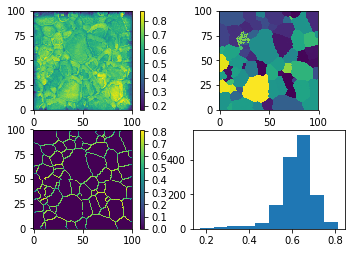

In [22]:
# reconstruct sample with parameter and take the voxels at grain boundary.
S.set_Q(7)
aIdxVoxel = S.geo_opt_phase_1(centerL, centerJ, centerK, centerRot)
S.save_square_mic('geo_opt_test.npy')
misOrienTmp = S.get_misorien_map(S.accMat)
grainBoundaryMask = misOrienTmp>0.1
#grainBoundary = ndi.maximum_filter(grainBoundary,size=3)
conf = S.squareMicData[:,:,6]
boundaryConf = conf.copy()
boundaryConf[misOrienTmp<0.1] = 0
f, axarr = plt.subplots(2,2)
cf00 = axarr[0,0].imshow(conf.swapaxes(0,1),origin='lower')
f.colorbar(cf00,ax=axarr[0,0])
axarr[0,1].imshow(S.squareMicData[:,:,3].swapaxes(0,1),origin='lower')
cf10 = axarr[1,0].imshow(boundaryConf.swapaxes(0,1),origin='lower')
f.colorbar(cf10,ax=axarr[1,0])
axarr[1,1].hist(boundaryConf[boundaryConf>0])

In [20]:
# fine tune parameters, usally max hitratio will >0.5, can iterate phase1 and phase2 multiple times until reconstruction is good enough
S.set_Q(10)
centerL, centerJ, centerK, centerRot = S.geo_opt_phase_2(aIdxVoxel,centerL, centerJ, centerK, centerRot)

(5, 5, 5, 9)
1000
update K to [[2014.93974602 2012.4550735 ]], max hitratio is  0.532141935825 ||ngle [343.21107726  87.03262692  22.09361646] 
update L to [[5.53988937 7.54504965]], max hitratio is  0.531394189596 ||euler angle [343.18976683  86.08507455  20.64686307]  
update J to [[982.0446267  975.67590559]], max hitratio is  0.530781888962 || angle [178.19195831  27.44345162 207.35816373]  
update K to [[2014.93974602 2012.37270697]], max hitratio is  0.529266530275 ||ngle [178.28509488  27.46614045 207.33674398] 
update L to [[5.53988937 7.54586689]], max hitratio is  0.527886629105 ||uler angle [178.08671877  27.16150885 207.02105401] 
update J to [[982.0446267  975.92409191]], max hitratio is  0.530041283369 || angle [178.13903787  27.37213339 207.47520458] 
update rot to [[[89.7739212  90.7694346  -0.12662033]: 94,reconstructed euler angle [178.30006646  27.45447582 207.30901392] 
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.532055932283 ,shape or rot is (1, 2

update rot to [[[89.7739212  90.7694346  -0.12662033]: 89,reconstructed euler angle [343.68492894  87.40499509  21.87368069] 
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.51439704895 ,shape or rot is (1, 2, 3)||
(0.09537168376367178, 3.8148673505468746, 1.9074336752734373)
(5, 5, 5, 9)
1000
update K to [[2014.46104122 2011.76551008]], max hitratio is  0.501543521881 ||ngle [175.08868944  55.80985552 182.65465358]  
update L to [[5.5147853  7.51886511]], max hitratio is  0.485872125626 ||[174.87281437  55.78823101 183.14211059] .33066638]  
update J to [[979.81373371 972.71311919]], max hitratio is  0.508809274435 ||[174.77910444  55.62445511 182.94693099] 93238]  
update K to [[2014.46104122 2011.78421016]], max hitratio is  0.498029273748 ||ngle [174.99157796  55.9729741  182.61270239]  
update L to [[5.5147853  7.51817273]], max hitratio is  0.499503296614 ||uler angle [174.5510853   55.42114503 182.69462394]  
update J to [[979.81373371 972.5449832 ]], max hitratio 

update K to [[2015.34904957 2012.68623211]], max hitratio is  0.501771980524 ||angle [ 28.04564423  70.67670576 324.5329962 ] 
update L to [[5.53924932 7.54031531]], max hitratio is  0.503276717663 ||euler angle [ 28.04564423  70.67670576 324.5329962 ] 
update J to [[979.64830349 972.71202533]], max hitratio is  0.49612107873 ||er angle [ 28.04564423  70.67670576 324.5329962 ] 
update rot to [[[89.7739212  90.7694346  -0.12662033]: 103,reconstructed euler angle [ 28.04564423  70.67670576 324.5329962 ] 
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.503438901901 ,shape or rot is (1, 2, 3)||
(0.20825000000000007, 8.329999999999961, 4.165000000000077)
(5, 5, 5, 9)
1000
update K to [[2015.39454749 2012.73173003]], max hitratio is  0.461536794901 ||ngle [183.20963348  68.59822548 162.84658696] 
update L to [[5.53154723 7.53261322]], max hitratio is  0.480523955822 ||uler angle [174.17730998  55.73205044 182.53358167]  
update J to [[978.48064157 971.5443634 ]], max hitratio i

update K to [[2015.1922804  2012.46993769]], max hitratio is  0.552909094095 ||ngle [163.61764699  77.34017778 218.27341877]  
update L to [[5.51612594 7.51698462]], max hitratio is  0.559678161144 ||euler angle [ 27.57467608  70.38287123 324.81620454] 
update J to [[975.22500036 968.2739465 ]], max hitratio is  0.549347275496 ||r angle [ 27.64351658  70.55891387 324.7959858 ] 
update K to [[2015.1922804  2012.39496484]], max hitratio is  0.548573225737 ||ngle [163.61764699  77.34017778 218.27341877]  
update L to [[5.51612594 7.51788143]], max hitratio is  0.544490522146 ||euler angle [ 27.59994648  70.37828198 324.64717105] 
update J to [[975.22500036 968.34846172]], max hitratio is  0.547454810143 ||.60811121  77.33370422 218.28750308] .34707114]  
update rot to [[[89.7739212  90.7694346  -0.12662033]: 99,reconstructed euler angle [163.61764699  77.34017778 218.27341877]  
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.545544880629 ,shape or rot is (1, 2, 3)||
(0.0567

update J to [[974.93448737 968.57449625]], max hitratio is  0.541790139675 || angle [178.41164456  27.45133914 207.15444756] 
update rot to [[[89.7739212  90.7694346  -0.12662033]onstructed euler angle [178.20402033  27.53226702 207.07120054] 894426] 
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.542599606514 ,shape or rot is (1, 2, 3)||
(0.145775, 5.831000000000011, 2.915500000000054)
(5, 5, 5, 9)
1000
update K to [[2015.40231311 2012.5429468 ]], max hitratio is  0.470524436235 ||ngle [188.13075778  65.35784721 161.22120644]  
update L to [[5.53359377 7.53477139]], max hitratio is  0.467068892717 ||uler angle [188.25908325  65.86016746 161.26063068]  
update J to [[975.29062397 968.93063285]], max hitratio is  0.479051303864 ||.12753441  65.27920369 161.1572748 ] .94822875]  
update K to [[2015.40231311 2012.59123048]], max hitratio is  0.467610937357 ||ngle [187.82462855  65.2374717  160.92663185]  
update L to [[5.53359377 7.53533112]], max hitratio is  0.46531919837

update J to [[974.12578041 966.04462562]], max hitratio is  0.531131696701 || angle [ 63.24349299  87.98614872 274.77260939]  
update K to [[2015.31181821 2012.52072515]], max hitratio is  0.53244779706 ||ngle [ 63.5364143   88.07415572 274.69190345]   
update L to [[5.4987034 7.5008249]], max hitratio is  0.526331990957 || euler angle [ 63.45378103  88.27674571 274.61048779]  
update J to [[974.12578041 966.26382828]], max hitratio is  0.543886327744 || angle [ 63.20303919  87.97548001 274.74310287]  
update rot to [[[89.7739212  90.7694346  -0.12662033]: 83,reconstructed euler angle [ 63.27336953  88.02971157 274.80107741]  
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.529665130377 ,shape or rot is (1, 2, 3)||
(0.03972230628756932, 1.588892251502776, 0.7944461257514013)
(5, 5, 5, 9)
1000
update K to [[2015.16016746 2012.3690744 ]], max hitratio is  0.57578458786 ||angle [280.26260591  89.76371894  95.47743836]  
update L to [[5.49952018 7.50164168]], max hitratio is 

update K to [[2015.15079933 2012.33619831]], max hitratio is  0.547017347813 ||ngle [174.63778757  55.50173723 182.88469419]  
update L to [[5.51282333 7.51433991]], max hitratio is  0.534690862894 ||uler angle [174.84444205  55.80267084 183.17173999]  
update J to [[972.80176567 965.73510839]], max hitratio is  0.555881112814 || angle [112.27661514  89.92811476 261.72189324]  
update K to [[2015.15079933 2012.26101942]], max hitratio is  0.541979891062 ||ngle [174.60606783  55.43120908 182.84905467]  
update L to [[5.51282333 7.51342395]], max hitratio is  0.548340076208 ||uler angle [174.52081379  55.34757062 183.54492778]  
update J to [[972.80176567 965.50160569]], max hitratio is  0.548287165165 || angle [174.53306662  55.45665452 183.45172313]  
update rot to [[[89.7739212  90.7694346  -0.12662033]constructed euler angle [174.62158649  55.465513   183.09733149] 799082] 
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.540756028891 ,shape or rot is (1, 2, 3)||
(0.0867

update J to [[971.44351128 964.58163465]], max hitratio is  0.518624073267 || angle [289.28708885  80.96691337  96.72963777]  
update rot to [[[89.7739212  90.7694346  -0.12662033]: 93,reconstructed euler angle [289.17575488  81.02084464  96.81807494]  
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.518392258883 ,shape or rot is (1, 2, 3)||
(0.027805614401298532, 1.112224576051946, 0.5561122880259862)
(5, 5, 5, 9)
1000
update K to [[2014.93992382 2012.0867012 ]], max hitratio is  0.537536722422 ||angle [ 27.89302459  70.70192479 324.62886332] 
update L to [[5.49856227 7.49693569]], max hitratio is  0.528417700529 ||euler angle [ 28.04605803  70.57862608 324.5054813 ] 
update J to [[971.46247451 964.60059788]], max hitratio is  0.535370069742 ||r angle [ 27.96491119  70.71607599 324.56460879] 
update K to [[2014.93992382 2012.06728573]], max hitratio is  0.532373827696 ||angle [ 28.04116931  70.71025012 324.60249768] 
update L to [[5.49856227 7.49774272]], max hitratio is

update L to [[5.51355766 7.51233033]], max hitratio is  0.515673232079 ||uler angle [344.11626856  86.97755514  21.50881122]  
update J to [[971.70197345 964.76581528]], max hitratio is  0.538515079021 || angle [345.20150316  89.29751075  11.99148215]  
update K to [[2015.01603309 2012.07956601]], max hitratio is  0.514717245102 ||angle [345.51629341  89.20634138  11.71280219] 
update L to [[5.51355766 7.51308275]], max hitratio is  0.513542932272 ||uler angle [343.95575997  87.11615998  21.47742349]  
update J to [[971.70197345 964.96883591]], max hitratio is  0.523308146 ||ler angle [345.54033575  89.13744528  11.79689378]  
update rot to [[[89.7739212  90.7694346  -0.12662033]: 99,reconstructed euler angle [345.52200306  89.19437486  11.75754498] 
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.516539132595 ,shape or rot is (1, 2, 3)||
(0.060715287500000055, 2.4286115000000024, 1.214305749999919)
(5, 5, 5, 9)
1000
update K to [[2015.22871469 2012.29224761]], max hitrat

update rot to [[[89.7739212  90.7694346  -0.12662033]: 101,reconstructed euler angle [  7.19705872  80.65215759 331.63538117] 
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.535231554508 ,shape or rot is (1, 2, 3)||
(0.019463930080908985, 0.7785572032363596, 0.3892786016181535)
(5, 5, 5, 9)
1000
update K to [[2014.98964083 2012.12872007]], max hitratio is  0.540567010641 ||ngle [174.56070146  55.42523307 183.10802798] 
update L to [[5.50919334 7.50914845]], max hitratio is  0.536111980677 ||ler angle [174.54798397  55.59076911 182.92526587]  
update J to [[971.23188056 964.38600204]], max hitratio is  0.536210948229 || angle [174.55096218  55.48771168 182.92435027] 
update K to [[2014.98964083 2012.06953661]], max hitratio is  0.535213536024 ||ngle [174.43299066  55.64183677 182.97412881] 
update L to [[5.50919334 7.50997042]], max hitratio is  0.528903675079 ||uler angle [174.65001378  55.44618569 182.89797242] 
update J to [[971.23188056 964.44479202]], max hitratio is

update J to [[971.35272321 964.9479131 ]], max hitratio is  0.554150223732 || angle [ 72.86878616  61.34620535 274.73212003]  
update K to [[2015.03436107 2012.01639728]], max hitratio is  0.55200625062 ||angle [ 72.82120874  61.21756682 274.72766623]  
update L to [[5.51270891 7.51009317]], max hitratio is  0.555972260237 ||uler angle [ 72.86878616  61.34620535 274.73212003]  
update J to [[971.35272321 964.708771  ]], max hitratio is  0.552666050196 || angle [ 72.85747681  61.38874118 274.76788262]  
update rot to [[[89.7739212  90.7694346  -0.12662033]: 89,reconstructed euler angle [ 72.86878616  61.34620535 274.73212003]  
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.56115038991 ,shape or rot is (1, 2, 3)||
(0.042500701250000036, 1.7000280500000016, 0.8500140250000418)
(5, 5, 5, 9)
1000
update K to [[2014.94257696 2011.92461317]], max hitratio is  0.517799901962 ||ngle [142.70639269  61.32420524 203.26152635] 
update L to [[5.51338994 7.5107742 ]], max hitratio is 

update K to [[2015.04911433 2012.05408658]], max hitratio is  0.518793547153 ||ngle [343.68197849  87.15563859  21.70775123]  
update L to [[5.51128887 7.50817997]], max hitratio is  0.536785846949 ||uler angle [343.76189029  87.13510692  21.54310563]  
update J to [[971.73170593 965.37066614]], max hitratio is  0.516719287634 || angle [343.68197849  87.15563859  21.70775123]  
update K to [[2015.04911433 2012.07189772]], max hitratio is  0.517286676168 ||ngle [343.68197849  87.15563859  21.70775123]  
update L to [[5.51128887 7.50744028]], max hitratio is  0.510631585121 ||uler angle [343.77003292  87.12399435  21.52704082]  
update J to [[971.73170593 965.5331846 ]], max hitratio is  0.519661802053 || angle [343.68197849  87.15563859  21.70775123]  
update rot to [[[89.7739212  90.7694346  -0.12662033]: 87,reconstructed euler angle [343.61714599  87.07791781  21.72271544]  
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.512452888489 ,shape or rot is (1, 2, 3)||
(0.0115

update J to [[971.53195024 965.18356882]], max hitratio is  0.543211060762 || angle [343.90040662  87.04609605  21.18162743]  
update rot to [[[89.7739212  90.7694346  -0.12662033]: 90,reconstructed euler angle [343.70099143  86.97676277  21.44430752]  
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.548923796415 ,shape or rot is (1, 2, 3)||
(0.029750490875000157, 1.19001963499996, 0.59500981749998)
(5, 5, 5, 9)
1000
update K to [[2014.91015423 2011.86793399]], max hitratio is  0.533052611351 ||ngle [ 11.47679336  74.47137448 340.982851  ] 
update L to [[5.51160521 7.51227091]], max hitratio is  0.530443882942 ||uler angle [ 11.42394056  74.66971753 340.93856412]  
update J to [[971.72306883 965.3746874 ]], max hitratio is  0.54356263876 ||r angle [ 11.32923511  74.51115413 341.00050105] 
update K to [[2014.91015423 2011.93102784]], max hitratio is  0.53968526125 ||angle [ 11.14588661  74.58920204 341.14297848]  
update L to [[5.51160521 7.51143225]], max hitratio is  0.5

update J to [[971.91425137 965.89478135]], max hitratio is  0.534801328182 || angle [ 27.61885525  70.62463951 324.82882619]  
update K to [[2014.84416272 2011.99681389]], max hitratio is  0.532096368074 ||angle [ 27.82681117  70.73017197 324.7089406 ] 
update L to [[5.51299215 7.5133654 ]], max hitratio is  0.529960149527 ||euler angle [ 27.72011185  70.62980502 324.91559469] 
update J to [[971.91425137 966.18340694]], max hitratio is  0.530780857801 ||r angle [ 27.52286966  70.57101657 324.80549478] 
update rot to [[[89.7739212  90.7694346  -0.12662033] 105,reconstructed euler angle [ 27.63930722  70.56613374 324.85136608]  
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.534704953432 ,shape or rot is (1, 2, 3)||
(0.00810672687869863, 0.3242690751479325, 0.16213453757396626)
(5, 5, 5, 9)
1000
update K to [[2014.81388899 2011.96654015]], max hitratio is  0.571562170982 ||ngle [194.19069365  66.76070589 136.54299451]  
update L to [[5.51385523 7.51422848]], max hitratio i

update K to [[2014.89857408 2012.21476525]], max hitratio is  0.509232336283 ||ngle [289.54106262  80.81145855  96.68966766]  
update L to [[5.51384334 7.51353497]], max hitratio is  0.517648786306 ||uler angle [289.47956377  80.67650102  96.68219514]  
update J to [[971.96351373 965.84650388]], max hitratio is  0.501015549898 || angle [289.35918818  80.77325711  96.68992746]  
update K to [[2014.89857408 2012.0651187 ]], max hitratio is  0.499030047655 ||89.15042999  81.17334313  96.68907282] 66985]  
update L to [[5.51384334 7.51419975]], max hitratio is  0.492776930332 ||uler angle [289.55422995  80.48722238  96.94840198]  
update J to [[971.96351373 965.42302752]], max hitratio is  0.489411050081 || angle [289.60570281  80.78212302  96.53992245]  
update rot to [[[89.7739212  90.7694346  -0.12662033]: 100,reconstructed euler angle [289.25900282  80.91591195  96.6395612 ] 
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.500764024258 ,shape or rot is (1, 2, 3)||
(0.0177

update J to [[971.91023702 965.62029777]], max hitratio is  0.500579404831 || angle [ 72.87574716  61.43155304 274.84055611]  
update rot to [[[89.7739212  90.7694346  -0.12662033]: 91,reconstructed euler angle [ 72.86790504  61.36971403 274.73731052]  
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.494346189499 ,shape or rot is (1, 2, 3)||
(0.0056747088150889535, 0.2269883526035707, 0.11349417630178535)
(5, 5, 5, 9)
1000
update K to [[2014.90185992 2012.12209168]], max hitratio is  0.539079856873 ||ngle [142.47184226  61.21619845 203.16736533] 
update L to [[5.50922732 7.50876411]], max hitratio is  0.542600780725 ||uler angle [142.61934646  61.3435966  203.27035123]  
update J to [[971.94655088 965.65661163]], max hitratio is  0.542862206697 || angle [142.45023211  61.23318021 203.1089656 ]  
update K to [[2014.90185992 2012.10496544]], max hitratio is  0.538991320133 ||ngle [142.61934646  61.3435966  203.27035123]  
update L to [[5.50922732 7.50790937]], max hitratio 

update L to [[5.51082894 7.51259719]], max hitratio is  0.567899250984 ||uler angle [ 46.01822018  65.07399784 328.70665122]  
update J to [[972.05852881 965.39552325]], max hitratio is  0.563513040543 || angle [ 46.05797826  65.08888016 328.80776466]  
update K to [[2014.84938974 2012.01755358]], max hitratio is  0.562433552742 ||ngle [ 45.94024297  65.07078038 328.78525438]  
update L to [[5.51082894 7.5135408 ]], max hitratio is  0.553803145885 ||uler angle [ 46.10063398  65.10745985 328.74850555]  
update J to [[972.05852881 965.61186004]], max hitratio is  0.564262592793 || angle [ 46.20765594  65.10116722 328.73506627]  
update rot to [[[89.7739212  90.7694346  -0.12662033]: 93,reconstructed euler angle [ 46.04429676  65.09190702 328.82880309]  
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.55540189743 ,shape or rot is (1, 2, 3)||
(0.012391079449437537, 0.49564317797746665, 0.24782158898873333)
(5, 5, 5, 9)
1000
update K to [[2014.83660424 2012.00476809]], max hit

update rot to [[[89.7739212  90.7694346  -0.12662033]: 95,reconstructed euler angle [174.5152402   55.62409519 182.95557792] 
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.537096756697 ,shape or rot is (1, 2, 3)||
(0.00397229617056232, 0.15889184682248159, 0.07944592341124079)
(5, 5, 5, 9)
1000
update K to [[2014.89147899 2012.15273433]], max hitratio is  0.515282523632 ||ngle [ 63.27336953  88.02971157 274.80107741]  
update L to [[5.50800822 7.5116729 ]], max hitratio is  0.514294469357 ||uler angle [ 63.2836141   88.00879063 274.75886696]  
update J to [[972.17231719 965.80684029]], max hitratio is  0.51112408638 ||r angle [ 63.27336953  88.02971157 274.80107741]  
update K to [[2014.89147899 2012.25541521]], max hitratio is  0.511868333817 ||ngle [ 63.31366715  88.02125586 274.83738651]  
update L to [[5.50800822 7.51092668]], max hitratio is  0.512131625414 ||uler angle [ 63.32967653  88.14641905 274.80424656]  
update J to [[972.17231719 966.03167267]], max hitrat

update J to [[972.28948786 966.02979761]], max hitratio is  0.52067656517 ||er angle [ 27.61959509  70.59340553 324.83611948] 
update K to [[2014.97711497 2012.19539812]], max hitratio is  0.517930084467 ||angle [208.69798596  70.93102146 152.68610574] 
update L to [[5.50473281 7.50532381]], max hitratio is  0.510351872444 ||uler angle [ 27.53639198  70.59418368 324.82398938]  
update J to [[972.28948786 965.86101697]], max hitratio is  0.519451910257 ||r angle [ 27.61959509  70.59340553 324.83611948] 
update rot to [[[89.7739212  90.7694346  -0.12662033]: 106,reconstructed euler angle [ 27.61959509  70.59340553 324.83611948] 
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.514862978458 ,shape or rot is (1, 2, 3)||
(0.008673755614606059, 0.34695022458426855, 0.17347511229216916)
(5, 5, 5, 9)
1000
update K to [[2014.96353583 2012.18181899]], max hitratio is  0.520358324051 ||ngle [ 10.88371146  74.66204098 341.40241642]  
update L to [[5.50603042 7.50662142]], max hitratio

update K to [[2014.97413134 2012.06083389]], max hitratio is  0.534551763535 ||angle [15.5862873  81.38443653 12.70820267] ]  
update L to [[5.50613725 7.50731902]], max hitratio is  0.534657549858 ||euler angle [15.5240254  81.41741264 12.76930397] ]  
update J to [[972.36273726 965.91248402]], max hitratio is  0.535629111528 ||r angle [15.56725812 81.40448937 12.71033595] ]  
update K to [[2014.97413134 2011.90331466]], max hitratio is  0.542906171083 ||angle [15.60276594 81.4732281  12.69879807] ]  
update L to [[5.50613725 7.50815802]], max hitratio is  0.532530522346 ||uler angle [215.30526395  77.81566191 165.02441887]  
update J to [[972.36273726 966.27121252]], max hitratio is  0.538530051708 ||r angle [15.70725105 81.35100876 12.70501691] ]  
update rot to [[[89.7739212  90.7694346  -0.12662033]: 103,reconstructed euler angle [15.51539344 81.34917892 12.79212487] ]  
  [89.81791158 90.31760014 -0.23845468]]], max hitratio is  0.532583647966 ,shape or rot is (1, 2, 3)||
(0.0023

# Reconstruction